# TEST: Supervised Autoencoder on MINST

## naive autoencoder VS supervised autoencoder

In [17]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import mnist
import numpy as np
from keras.callbacks import TensorBoard, EarlyStopping
import utilities

from evaluator import Evaluator
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import matplotlib
import umap

#### load data and split: train - test

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = utilities.from_np_to_one_hot(y_train)
y_test = utilities.from_np_to_one_hot(y_test)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# naive autoencoder 32  + UMAP 2

In [19]:
autoencoder,encoder = generate_deep_autoencoder()

path = "test_MINST/esperimento_4" 
tb = TensorBoard(log_dir=path)
er = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                validation_split=0.2,
                verbose=False,
                callbacks=[tb,er])

autoencoder.evaluate(x_test,x_test)

10000/10000 [==============================] - 1s 63us/step


0.19014332954883575

In [21]:
emb_train = encoder.predict(x_train)
emb_test = encoder.predict(x_test)

In [22]:
eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = eva.performance_with_kfold(emb_test,y_test)
print("on 32")
print("K.N.N.  accuracy : ",np.mean(acc))
print("K.N.N.  precision: ",np.mean(pre))
print("K.N.N.  recall   : ",np.mean(rec))
print("K.N.N.  f1       : ",np.mean(f))

on 32
K.N.N.  accuracy :  0.7714000000000001
K.N.N.  precision:  0.7744121063242339
K.N.N.  recall   :  0.7714000000000001
K.N.N.  f1       :  0.7711355320804902


In [32]:
uma_1 = umap.UMAP(n_components=2)
uma_1.fit(emb_train,utilities.from_one_hot_to_np(y_train))
res_uma_test = uma_1.transform(emb_test)

Dim_2
K.N.N.  accuracy :  0.7297
K.N.N.  precision:  0.7323029370920994
K.N.N.  recall   :  0.7297
K.N.N.  f1       :  0.729167277202834


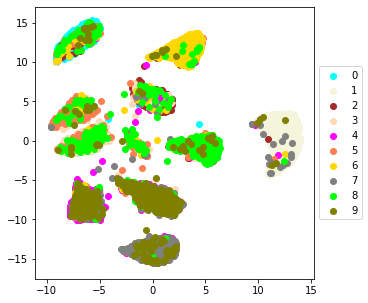

In [33]:
plot_embedding(y_test,res_uma_test)

# SUPERVISED autoencoder 32  + UMAP 2

In [182]:
autoencoder, encoder =  generate_supervised_autoencoder()

In [183]:
path = "test_MINST/esperimento_600_1" 
tb = TensorBoard(log_dir=path)
autoencoder.fit([x_train], [x_train,y_train],
                epochs=200,
                batch_size=256,
                validation_split=0.2,
                verbose=False,
                callbacks=[tb])


autoencoder.evaluate(x_test,[x_test,y_test])

10000/10000 [==============================] - 1s 50us/step


[0.12732968079447746,
 0.05813804941177368,
 0.6919162983992007,
 0.05813804941177368,
 0.9549]

In [184]:
emb_2_train = encoder.predict(x_train)
emb_2_test = encoder.predict(x_test)

In [185]:
eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = eva.performance_with_kfold(emb_2_test,y_test)
print("on 32")
print("K.N.N.  accuracy : ",np.mean(acc))
print("K.N.N.  precision: ",np.mean(pre))
print("K.N.N.  recall   : ",np.mean(rec))
print("K.N.N.  f1       : ",np.mean(f))

on 32
K.N.N.  accuracy :  0.9413
K.N.N.  precision:  0.9423914439255501
K.N.N.  recall   :  0.9413
K.N.N.  f1       :  0.9412642469663067


In [186]:
uma_2 = umap.UMAP(n_components=2)
res_uma_2_test = uma_2.fit(emb_2_train,utilities.from_one_hot_to_np(y_train)).transform(emb_2_test)

Dim_2
K.N.N.  accuracy :  0.9345000000000001
K.N.N.  precision:  0.9351510901562232
K.N.N.  recall   :  0.9345000000000001
K.N.N.  f1       :  0.9344364791958174


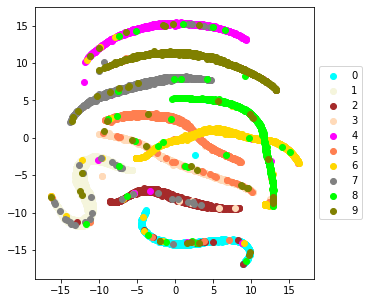

In [187]:
plot_embedding(y_test,res_uma_2_test)

# SUPERVISED autoencoder 32  + UMAP 2 
# MYCALLBACK  SINUSOIDAL

In [212]:
count = 100003

In [219]:
autoencoder, encoder =  generate_supervised_autoencoder_callback()

In [220]:
path = "test_MINST/esperimento_00000"+str(count)
tb = TensorBoard(log_dir=path)

epochs = 200
scaler = 50
my = MyCallback_sinusoidal(w_dec,w_cla,epochs,
                            n_period=4,
                            scal_c=100,
                            scal_d=10)

[x_train], [x_train,y_train]
h = autoencoder.fit(x_train,
                    {'decoder': x_train, 'classifier': y_train},
                    epochs=epochs,  
                    batch_size=256,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[tb,my])

a = autoencoder.evaluate(x_train,[x_train,y_train])
n = autoencoder.metrics_names
for i in range(0,len(a)):
    print(str(n[i])+" "+str(a[i]))

60000/60000 [==============================] - 3s 57us/step
loss 0.06438621998429299
decoder_loss 0.04756948824326197
classifier_loss 0.1681673195452305
decoder_mean_squared_error 0.04756948824326197
classifier_acc 0.9876666666666667


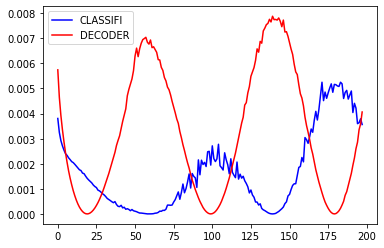

In [221]:
plot_loss(my,h)

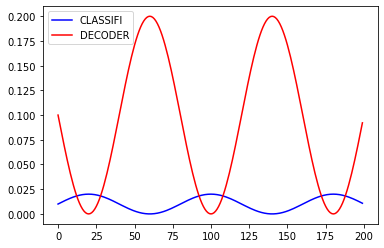

In [222]:
plt.plot(my.w_cals,label="CLASSIFI",c = 'b')
plt.plot(my.w_decs,label="DECODER", c="r")
plt.legend()

In [223]:
emb_3_train = encoder.predict(x_train)
emb_3_test = encoder.predict(x_test)

In [224]:
eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
acc, pre, rec, f = eva.performance_with_kfold(emb_3_test,y_test)
print("on 32")
print("K.N.N.  accuracy : ",np.mean(acc))
print("K.N.N.  precision: ",np.mean(pre))
print("K.N.N.  recall   : ",np.mean(rec))
print("K.N.N.  f1       : ",np.mean(f))

on 32
K.N.N.  accuracy :  0.9432
K.N.N.  precision:  0.944141513494371
K.N.N.  recall   :  0.9432
K.N.N.  f1       :  0.9431292785500609


Dim_2
K.N.N.  accuracy :  0.9342
K.N.N.  precision:  0.9351938607873411
K.N.N.  recall   :  0.9342
K.N.N.  f1       :  0.9341687085028468


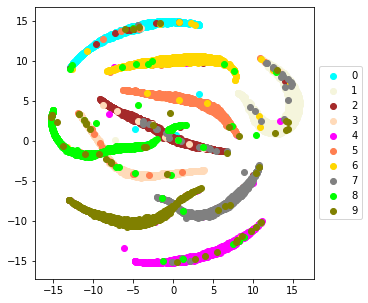

CPU times: user 2min 39s, sys: 40.5 s, total: 3min 19s
Wall time: 3min 20s


In [225]:
%%time
uma_3 = umap.UMAP(n_components=2)
res_uma_3_test = uma_3.fit(emb_3_train,utilities.from_one_hot_to_np(y_train)).transform(emb_3_test)
plot_embedding(y_test,res_uma_3_test)

# to use

In [170]:
import keras.backend.tensorflow_backend as K
from keras import callbacks
import math

class MyCallback_sinusoidal(callbacks.Callback):
    def __init__(self, w_dec, w_cla, n_epoch,n_period,scal_c,scal_d):
        
        self.n_epoch = n_epoch
        self.w_dec = w_dec
        self.w_cla = w_cla
        
        self.w_cals = []
        self.w_decs = []
        
        
        
        samples_s = np.linspace(-(math.pi), n_period*(math.pi),n_epoch+1)
        

        s = np.sin(samples_s)
        c = -s
        s = s + 1
        c = c + 1

        s = s/scal_d
        c = c/scal_c        
        
        self.sin = s
        self.cos = c

        
    def on_epoch_end(self, epoch, logs={}):
        K.set_value(self.w_cla, self.cos[epoch])
        K.set_value(self.w_dec, self.sin[epoch])

            
        self.w_decs.append(K.get_value(self.w_dec))
        self.w_cals.append(K.get_value(self.w_cla))
            

            

In [169]:
from keras import callbacks
import math

class MyCallback_low_high(callbacks.Callback):
    def __init__(self, w_dec, w_cla, n_epoch,l_period):
        
        self.n_epoch = n_epoch
        self.w_dec = w_dec
        self.w_cla = w_cla
        
        self.w_cals = []
        self.w_decs = []
        
        self.l_period = l_period * 2
        self.current = 0
        
    def on_epoch_end(self, epoch, logs={}):
        
        if (self.current <= (self.l_period/2)):
            self.current = self.current + 1
            K.set_value(self.w_cla, 0)
            K.set_value(self.w_dec, 0.1)
        else:
            self.current = self.current + 1
            K.set_value(self.w_cla, 0.1)
            K.set_value(self.w_dec, 0)
            
        if (self.current == self.l_period):
            self.current = 0

            
        self.w_decs.append(K.get_value(self.w_dec))
        self.w_cals.append(K.get_value(self.w_cla))
            


In [5]:
from keras import callbacks
import math

class MyCallback(callbacks.Callback):
    def __init__(self, w_dec, w_cla, n_epoch,n_period):
        
        self.n_epoch = n_epoch
        self.w_dec = w_dec
        self.w_cla = w_cla
        self.w_cals = []
        self.w_decs = []
        
        self.clas = []
        self.decs = []
        
        samples = np.linspace(0, n_period*(math.pi),n_epoch)
        self.sinu = np.cos(samples)
        self.sinu = self.sinu + 1.01
        self.sinu = self.sinu * 1
        


        
        self.new_dec = 0.1
        
        self.first_ite = True
    # customize your behavior
        
    def on_epoch_end(self, epoch, logs={}):
        
        cla = logs['classifier_loss']
        dec = logs['decoder_loss']
        
        self.clas.append(cla)
        self.decs.append(dec)
        
        dec_mean = np.mean(self.decs)
        cla_mean = np.mean(self.clas)
        
        self.new_cla = dec_mean/cla_mean
        self.new_dec = self.new_dec * self.sinu[i]
        # dai piu peso al decoder al crescere delle epoche
        #new_dec = (self.sinu[epoch] * K.get_value(self.w_dec))/10
        
        self.w_decs.append(self.new_dec)
        self.w_cals.append(self.new_cla)
        
        K.set_value(self.w_cla, self.new_cla)
        K.set_value(self.w_dec, self.new_dec)

In [167]:
def plot_loss(my,h):
    clas = my.w_cals
    clal = h.history['classifier_loss']

    dec = my.w_decs
    decl = h.history['decoder_loss']

    c = []
    d = []

    for i in range(len(dec)):
        c.append(clas[i]*clal[i])
        d.append(dec[i]*decl[i])

    plt.plot(c[1:-1],label="CLASSIFI",c = 'b')
    plt.plot(d[1:-1],label="DECODER", c="r")
    plt.legend()
    plt.show()


In [7]:
from keras import callbacks

class MyCallback(callbacks.Callback):
    def __init__(self, w_dec, w_cla, n_epoch):
        
        self.n_epoch = n_epoch
        self.w_dec = w_dec
        self.w_cla = w_cla
        self.w_cals = []
        self.w_decs = []
    # customize your behavior
        
    def on_epoch_end(self, epoch, logs={}):
        
        
        cla = logs['classifier_loss']
        dec = logs['decoder_loss']
        # redi uguale il peso delle 2 loss
        tmp = dec/cla
        
        # dai piu peso al decoder al crescere delle epoche
        new_dec = 5*epoch / (self.n_epoch) 
        
        self.w_decs.append(K.get_value(self.w_dec))
        self.w_cals.append(K.get_value(self.w_cla))
        
        K.set_value(self.w_cla, tmp)
        K.set_value(self.w_dec, new_dec)

In [8]:
def generate_deep_autoencoder():
    input_img = Input(shape=(784,))
    enc = Dense(128, activation='relu')(input_img)
    enc = Dense(64, activation='relu')(enc)
    enc = Dense(32, activation='relu')(enc)

    dec = Dense(64, activation='relu')(enc)
    dec = Dense(128, activation='relu')(dec)
    dec = Dense(784, activation='sigmoid')(dec)

    autoencoder = Model(input_img,dec)
    encoder = Model(input_img,enc)

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    return (autoencoder, encoder)

In [9]:
def generate_supervised_autoencoder():
    input_img = Input(shape=(784,))
    enc = Dense(128, activation='relu')(input_img)
    enc = Dense(64, activation='relu')(enc)
    enc = Dense(32, activation='relu')(enc)

    dec = Dense(64, activation='relu')(enc)
    dec = Dense(128, activation='relu')(dec)
    dec = Dense(784, activation='sigmoid',name="decoder")(dec)


    cla = Dense(10,name="classifier",activation='softmax')(enc)

    autoencoder = Model(inputs=input_img,outputs=[dec,cla])
    encoder = Model(input_img,enc)

    autoencoder.compile(optimizer='adadelta', metrics={'decoder': 'mse', 'classifier': ['acc']},
                        loss = {'decoder': 'mean_squared_error', 'classifier': 'categorical_crossentropy'},
                        loss_weights = {'decoder': 1, 'classifier': 0.1})
    
    return(autoencoder,encoder)

In [188]:
from keras import backend as K

def generate_supervised_autoencoder_callback():
    w_dec = K.variable(1)
    w_cla = K.variable(0.1)

    input_img = Input(shape=(784,))
    enc = Dense(128, activation='relu')(input_img)
    enc = Dense(64, activation='relu')(enc)
    enc = Dense(32, activation='relu')(enc)

    dec = Dense(64, activation='relu')(enc)
    dec = Dense(128, activation='relu')(dec)
    dec = Dense(784, activation='sigmoid',name="decoder")(dec)


    cla = Dense(10,name="classifier",activation='softmax')(enc)

    autoencoder = Model(inputs=input_img,outputs=[dec,cla])
    encoder = Model(input_img,enc)

    autoencoder.compile(optimizer='adadelta', metrics={'decoder': 'mse', 'classifier': ['acc']},
                        loss = {'decoder': 'mean_squared_error', 'classifier': 'categorical_crossentropy'},
                        loss_weights = {'decoder': w_dec, 'classifier': w_cla})
    return(autoencoder,encoder)

In [10]:
def plot_embedding(y_test,res_uma_test):
    
    eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
    acc, pre, rec, f = eva.performance_with_kfold(res_uma_test,y_test)
    print("Dim_2")
    print("K.N.N.  accuracy : ",np.mean(acc))
    print("K.N.N.  precision: ",np.mean(pre))
    print("K.N.N.  recall   : ",np.mean(rec))
    print("K.N.N.  f1       : ",np.mean(f))
    
    tmp_y = utilities.from_one_hot_to_np(y_test)
    group = [ [] for x in range(10)]

    for i in range(len(tmp_y)):
        group[tmp_y[i]].append(res_uma_test[i])

    color_names = ["aqua", "beige", "brown", "peachpuff", "fuchsia","coral","gold","gray","lime","olive"]
    f = plt.figure(figsize=(5,5))
    for i in range(10):
        xx = group[i]
        xx = np.array(xx)
        xx = xx[:,0]
        yy = group[i]
        yy = np.array(yy)
        yy = yy[:,1]

        plt.scatter(xx,yy, c=color_names[i], label=str(i))

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
